In [45]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.optimize

## Segédfüggvények

In [15]:
# determines if n is probably-prime or composite using miller rabin test. Tests k times
def is_prime(n, k=20): # miller-rabin test
    if n == 2:
        return True
    for _ in range(k):
        witness = 1
        a = random.randint(2, n-1)
        if gcd(a, n)[1] != 1:
            return False
        d = n-1
        r = 0
        while d % 2 == 0:
            d = d//2
            r += 1
        s = int_pow_mod(a, d, n)
        if s == 1:
            witness = 0
        for i in range(r):
            if s == n-1:
                witness = 0
            s = s**2 % n
        if witness == 1:
            return False
    return True

def gcd(m, n): # euclid's algorithm
    a = max(m,n)
    b = min(m,n)
    if a%b == 0:
        return a, b
    c = a % b
    return gcd(b, c) # c a legnagyobb közös osztó

In [16]:
def int_nth_root(A, n): # calculate floor of nth root of A
    if A<0:
        if n%2 == 0:
            raise ValueError
        return -int_nth_root(-A,n)
    if A==0:
        return 0
    n1 = n-1
    if A.bit_length() < 1024: # float(n) safe from overflow
        xk = int( round( pow(A,1.0/n) ) )
        xk = ( n1*xk + A//pow(xk,n1) )//n # Ensure xk >= floor(nthroot(A)).
    else:
        xk = 1 << -(-A.bit_length()//n) # 1 << sum(divmod(A.bit_length(),n))
                                        # power of 2 closer but greater than the nth root of A
    while True:
        d = A // pow(xk,n1)
        if xk <= d:
            return xk
        xk = (n1*xk + d)//n

In [17]:
def two_pow(A, k): # computes A**(2**k), A: L bit int, k < log(L)
    result = np.copy(A)
    for i in range(k): # k multiplying operations
        result = result**2 
    return result  # max O(L^2*log(L)) operations

def int_pow(A, n): # computes A**n in polynomal time, A: L bit int, n < L
    n_bin = list(bin(n))
    index = n_bin.index('b')
    n_bin = n_bin[index+1:]
    l = len(n_bin) # l < log(L)
    result = 1
    for i in range(l):
        bit = int(n_bin[l-i-1])
        if bit == 1:
            result = result*two_pow(A, i)
    return result # max O(log(L)*L^2*log(L))


In [18]:
def two_pow_mod(A, k, N): #computes A**(2**k) mod N, A: L bit int, k < log(L)
    result = np.copy(A)
    for i in range(k): # k multiplying operations
        result = result**2 % N
    return result  # max O(L^2*log(L)) operations

def int_pow_mod(A, n, N): #computes A**n mod N in polynomal time, A: L bit int, n < L
    n_bin = list(bin(n))
    index = n_bin.index('b')
    n_bin = n_bin[index+1:]
    l = len(n_bin) # l < log(L)
    result = 1
    for i in range(l):
        bit = int(n_bin[l-i-1])
        if bit == 1:
            result = result*two_pow_mod(A, i, N) % N
    return result # max O(log(L)*L^2*log(L))

In [19]:
def find_int_pow(N):
    n = N.bit_length()
    for i in range(2, n):
        a = int_nth_root(N, i)
        if int_pow(a, i) == N:
            return a, i
    return N, 1

def order(a, N): 
    if gcd(a, N)[1] != 1:
        raise ValueError("a and N have to be coprime")
    s = 1
    i = 0
    while i == 0 or s != 1:
        s = (a*s) % N
        i += 1
    return i

## Kapuk száma, mélység

In [23]:
def dep(n):
    return 232*n**3+282*n**2+32*n

def cx(n):
    return 16*n**4+152*n**3+188*n**2+104*n

def sing(n):
    return 24*n**4 + 176*n**3 + 230*n**2 + 139*n

In [20]:
compl = {'depth': [15270, 15270, 15594, 15274, 15590, 15594, 28898, 28906, 29226, 27802, 29298, 28926, 28130, 28910, 29238, 
                   29294, 50423, 50924, 50902, 51338, 51037, 45995, 51001, 51296, 50912, 50457, 51296, 50888, 46245, 50912, 
                   51338, 51039, 51116, 50916, 51126, 51530, 51520, 45940, 46642, 51584, 51806, 51520, 46962, 51818, 51906, 
                   51144, 51884, 46672, 51712, 51862, 52092, 46926, 46256, 52042, 51726, 51892, 50416, 50788, 46480, 51034, 
                   46454, 50828, 50942, 46132, 51074, 51352, 51218, 50418, 51062, 51366, 46128, 51036, 51434, 46912, 50952, 
                   46920, 51392, 51216, 51402, 51796, 51890, 46638, 52420, 51924, 52198, 52154, 46676, 46256, 52092, 51428, 
                   46076, 46972, 52248, 52142, 51950, 51868, 46988, 51936, 52390, 52086, 46014, 45902, 47458, 47406, 46164, 
                   47372, 47280, 45932, 47270, 45674, 46724, 47360, 47452, 47370, 46810, 46048, 47304, 47530, 47362, 46168, 
                   46256, 47482, 46522, 47428, 47448, 46754, 47508, 47418, 46526, 46780, 51136, 52162, 51520, 52098, 51948, 
                   51880, 52278, 46668, 51786, 51542, 52008, 51850, 52342, 51942, 46128, 46718, 52158, 52016, 52004, 51204, 
                   51872, 52004, 46702, 46132, 52004, 52242, 51776, 52226, 52230, 51672, 46710, 52114, 52376, 52388, 52312, 
                   52226, 52328, 51936, 50473, 51086, 51386, 54068, 53641, 50902, 54029, 51325, 51498, 51082, 51089, 45980, 
                   51371, 51440, 51086, 54062, 51082, 50494, 53986, 51203, 51552, 51328, 46116, 50910, 51307, 51082, 51224, 
                   53969, 51115, 54068, 53728, 51522, 51569, 51094, 45214, 45198, 54356, 45414, 54380, 54534, 54412, 45206, 
                   54372, 54412, 54380, 54554, 54530, 54530, 54412, 54554, 46096, 45210, 54380, 54554, 54392, 54348, 54404, 
                   54554, 54554, 54554, 46104, 54554, 54384, 54550, 46312, 54530, 46096, 46104],
         'single': [16255, 16255, 16525, 16255, 16525, 16525, 34428, 34428, 34698, 33456, 34752, 34428, 33726, 34428, 34698, 
                    34752, 65624, 66033, 66003, 66360, 66172, 61636, 66112, 66360, 66033, 65624, 66359, 66003, 61855, 66033, 
                    66359, 66113, 66169, 66033, 66138, 66460, 66489, 61627, 62250, 66489, 66705, 66460, 62493, 66705, 66786, 
                    66138, 66757, 62250, 66624, 66759, 66921, 62491, 61899, 66919, 66624, 66786, 65517, 65841, 62088, 66029, 
                    62088, 65841, 65949, 61790, 66057, 66300, 66192, 65517, 66057, 66299, 61791, 66029, 66354, 62465, 65949, 
                    62466, 66353, 66192, 66408, 66759, 66813, 62250, 67245, 66813, 67083, 67029, 62250, 61899, 66975, 66408, 
                    61737, 62520, 67083, 67029, 66840, 66759, 62520, 66840, 67245, 66975, 61737, 61629, 62952, 62924, 61845, 
                    62898, 62789, 61629, 62789, 61413, 62331, 62870, 62924, 62871, 62385, 61737, 62843, 63005, 62843, 61845, 
                    61899, 62952, 62142, 62951, 62951, 62331, 63005, 62897, 62142, 62385, 66165, 67029, 66462, 66948, 66786, 
                    66786, 67110, 62277, 66705, 66462, 66867, 66705, 67137, 66786, 61791, 62277, 67029, 66867, 66840, 66165, 
                    66786, 66867, 62277, 61791, 66867, 67029, 66624, 67029, 67056, 66624, 62277, 66948, 67191, 67191, 67110, 
                    67056, 67137, 66840, 65634, 66149, 66419, 68637, 68312, 65987, 68609, 66364, 66527, 66149, 66148, 61659, 
                    66365, 66420, 66149, 68611, 66149, 65636, 68556, 66282, 66528, 66312, 61768, 65987, 66286, 66149, 66308, 
                    68555, 66151, 68637, 68314, 66528, 66529, 66149, 61197, 61197, 68838, 61197, 68838, 68973, 68838, 61197, 
                    68838, 68838, 68838, 68973, 68973, 68973, 68838, 68973, 61953, 61197, 68838, 68973, 68838, 68838, 68838, 
                    68973, 68973, 68973, 61953, 68973, 68838, 68973, 61953, 68973, 61953, 61953], 
         'cnot': [13116, 13116, 13356, 13116, 13356, 13356, 27078, 27078, 27318, 26214, 27366, 27078, 26454, 27078, 27318, 
                  27366, 50730, 51090, 51066, 51378, 51210, 47202, 51162, 51378, 51090, 50730, 51378, 51066, 47394, 51090, 
                  51378, 51162, 51210, 51090, 51162, 51450, 51474, 47154, 47706, 51474, 51666, 51450, 47922, 51666, 51738, 
                  51162, 51714, 47706, 51594, 51714, 51858, 47922, 47394, 51858, 51594, 51738, 50610, 50898, 47562, 51066, 
                  47562, 50898, 50994, 47298, 51090, 51306, 51210, 50610, 51090, 51306, 47298, 51066, 51354, 47898, 50994, 
                  47898, 51354, 51210, 51402, 51714, 51762, 47706, 52146, 51762, 52002, 51954, 47706, 47394, 51906, 51402, 
                  47250, 47946, 52002, 51954, 51786, 51714, 47946, 51786, 52146, 51906, 47250, 47154, 48330, 48306, 47346, 
                  48282, 48186, 47154, 48186, 46962, 47778, 48258, 48306, 48258, 47826, 47250, 48234, 48378, 48234, 47346, 
                  47394, 48330, 47610, 48330, 48330, 47778, 48378, 48282, 47610, 47826, 51186, 51954, 51450, 51882, 51738, 
                  51738, 52026, 47730, 51666, 51450, 51810, 51666, 52050, 51738, 47298, 47730, 51954, 51810, 51786, 51186, 
                  51738, 51810, 47730, 47298, 51810, 51954, 51594, 51954, 51978, 51594, 47730, 51882, 52098, 52098, 52026, 
                  51978, 52050, 51786, 50730, 51186, 51426, 53394, 53106, 51042, 53370, 51378, 51522, 51186, 51186, 47202, 
                  51378, 51426, 51186, 53370, 51186, 50730, 53322, 51306, 51522, 51330, 47298, 51042, 51306, 51186, 51330, 
                  53322, 51186, 53394, 53106, 51522, 51522, 51186, 46770, 46770, 53562, 46770, 53562, 53682, 53562, 46770, 
                  53562, 53562, 53562, 53682, 53682, 53682, 53562, 53682, 47442, 46770, 53562, 53682, 53562, 53562, 53562, 
                  53682, 53682, 53682, 47442, 53682, 53562, 53682, 47442, 53682, 47442, 47442]}

In [21]:
depth = {}
single = {}
cnot = {}
i = 0
for N in range(2, 64):
    if find_int_pow(N)[1] == 1 and N%2 != 0 and is_prime(N)==False:
        depth[N] = []
        single[N] = []
        cnot[N] = []
        for a in range(2, N-1):
            if gcd(a, N)[1] == 1:
                depth[N].append(compl['depth'][i])
                single[N].append(compl['single'][i])
                cnot[N].append(compl['cnot'][i])
                i += 1

Text(0, 0.5, 'egy qubites kapuk száma')

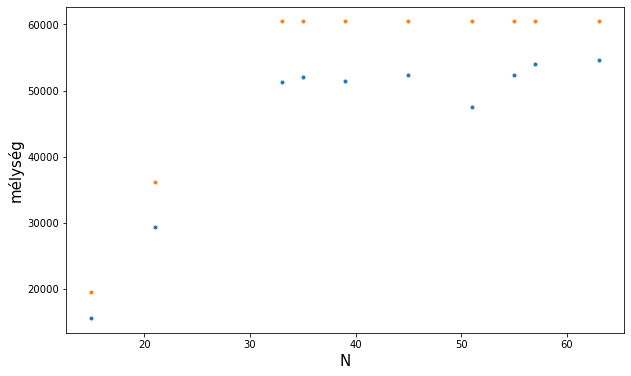

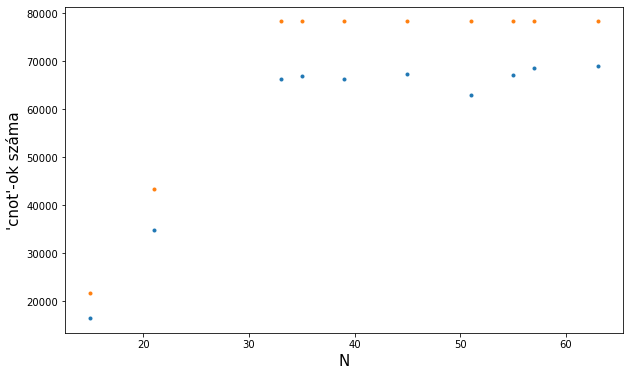

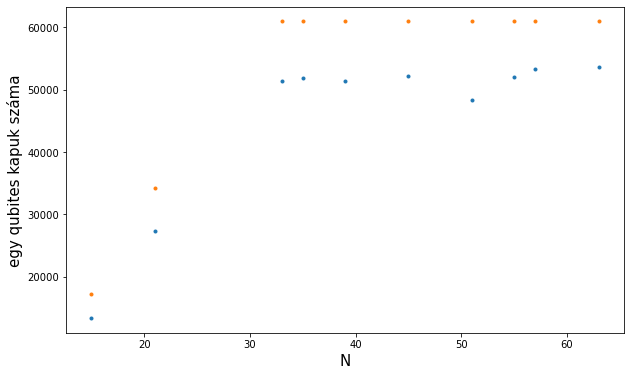

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(depth.keys(), [max(depth[N]) for N in depth.keys()], '.')
ax.plot(depth.keys(), [dep(N.bit_length()) for N in depth.keys()], '.')
ax.set_xlabel('N', fontsize=15)
ax.set_ylabel('mélység', fontsize=15)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(single.keys(), [max(single[N]) for N in single.keys()], '.')
ax.plot(single.keys(), [sing(N.bit_length()) for N in single.keys()], '.')
ax.set_ylabel("'cnot'-ok száma", fontsize=15)
ax.set_xlabel('N', fontsize=15)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(cnot.keys(), [max(cnot[N]) for N in cnot.keys()], '.')
ax.plot(cnot.keys(), [cx(N.bit_length()) for N in cnot.keys()], '.')
ax.set_xlabel('N', fontsize=15)
ax.set_ylabel('egy qubites kapuk száma', fontsize=15)

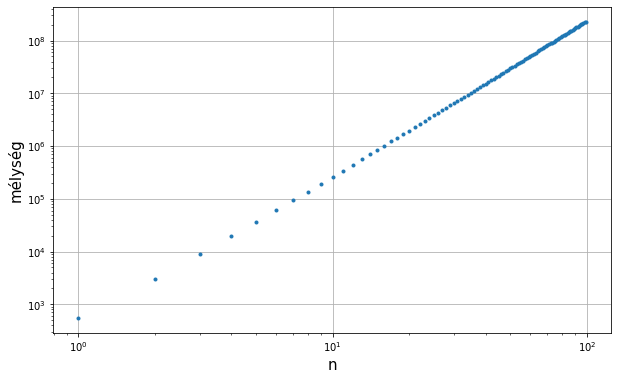

In [159]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(100), [dep(n) for n in range(100)], '.')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('n', fontsize=15)
ax.set_ylabel('mélység', fontsize=15)
ax.grid()

## futtatások száma

In [47]:
def lin(x, a, b):
    return a*x+b

def log(x, a):
    return(a*np.log2(x))

In [121]:
num = []
E = []
Expect = {}
for N in range(4, 1000):
    if is_prime(N)==False and find_int_pow(N)[1] == 1 and N%2 == 1:
        num.append(N)
        
        i = 0 # itt számláljuk, hogy hány sikeres 'a' van 
        frac = []
        for a in range(2, N-1):
            if gcd(a, N)[1] == 1:
                r = order(a, N)
                j = 0
                for s in range(1, r):
                    if gcd(s, r)[1] == 1:
                        j += 1
                frac.append(r/j)
                if r%2 == 0 and int_pow_mod(a, r//2, N) != N-1:
                    i += 1
            else:
                i += 1
                
        q = i/(N-3)
        E.append(1/(q*(N-3))*sum(frac))
        Expect[N] = 1/(q*(N-3))*sum(frac)

[0.28252494]


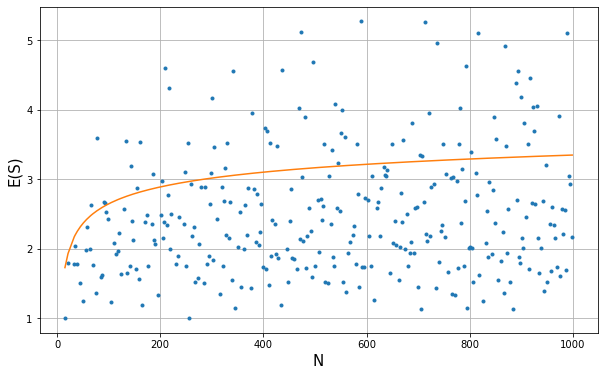

In [170]:
num = np.array(num, dtype = int)
fit, cov = scipy.optimize.curve_fit(log, num, E, p0=[1])
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(num, E, '.')
ax.set_xlabel('N', fontsize=15)
ax.set_ylabel('E(S)', fontsize=15)
ax.grid()
ax.plot(num, np.log(np.log(num))/np.euler_gamma)
print(fit)

## Várható időtartam

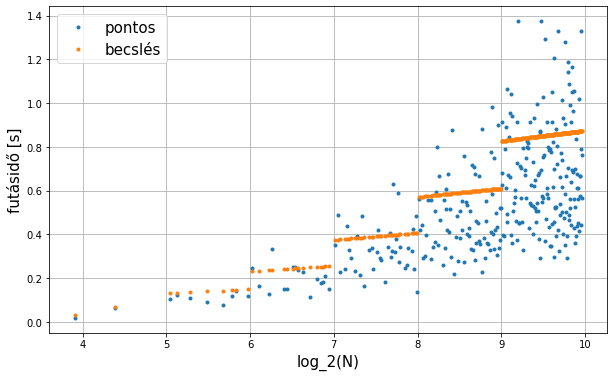

In [173]:
E = np.array(E)
power = 3
n = np.array([int(N).bit_length() for N in num])
x = num

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.log2(num), 10**-6*E*dep(n), '.', label='pontos')
ax.plot(np.log2(x), 10**-6*np.log(np.log(x))/np.euler_gamma*np.array([dep(int(N).bit_length()) for N in x]), '.', label='becslés')
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel('log_2(N)', fontsize=15)
ax.set_ylabel('várható futásidő [s]', fontsize=15)

ax.grid()
ax.legend(loc='best', fontsize=15)

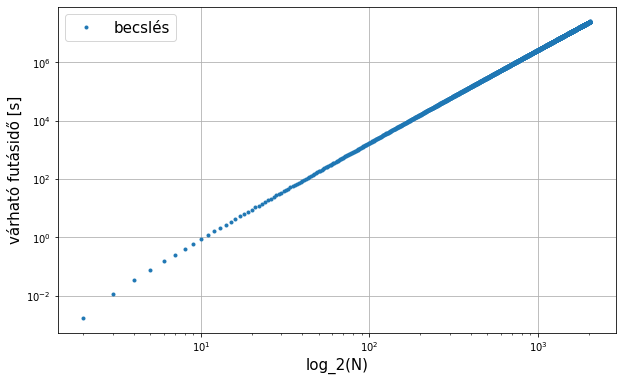

In [229]:
def expect(n): # estimate of expected value of number of runs
    return np.log(np.log(2))+np.log(n)

power = 11
n = np.arange(2, 2049)
n = n.astype('float64')
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(n, 10**-6*expect(n)/np.euler_gamma*dep(n), '.', label='becslés')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('log_2(N)', fontsize=15)
ax.set_ylabel('várható futásidő [s]', fontsize=15)

ax.grid()
ax.legend(loc='best', fontsize=15)

In [227]:
type(n[3])

numpy.int32